In [40]:
import pandas as pd
import re
from konlpy.tag import Okt
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

#### 월간 네이버 검색량 csv불러오기

In [22]:
data_N = pd.read_csv('./data/네이버검색량.csv',encoding='utf-8')
data_N

,키워드,월간 검색량 (Total)
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030
5,유류비,12060
6,주유소 기름값,11330
7,주유,8530
8,주유비계산,8420
9,유가정보,6530


#### 월간 구글 검색량 csv 불러오기

In [23]:
data_G = pd.read_csv('./data/구글검색량.csv',encoding='utf-8')
data_G

,키워드,월 검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880
5,기름값 계산기,480
6,서울 기름값,480
7,기름값 추이,390
8,기름값 시세,260
9,기름값 상승,210


#### 구글 월 검색량 값이 0인 index 제거

In [24]:
data_G = data_G.drop(index=data_G[data_G['월 검색량'] == 0].index)
data_G

,키워드,월 검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880
5,기름값 계산기,480
6,서울 기름값,480
7,기름값 추이,390
8,기름값 시세,260
9,기름값 상승,210


#### concat하기전 컬럼명 맞추기

In [25]:
data_N.rename(columns={'월간 검색량 (Total)' : '월간검색량'}, inplace=True)
data_G.rename(columns={'월 검색량' : '월간검색량'}, inplace=True)

In [26]:
data_N.head()

,키워드,월간검색량
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030


In [27]:
data_G.head()

,키워드,월간검색량
0,기름값 오르는 이유,1900
1,미국 기름값,1600
2,기름값 전망,1300
3,기름값 계산,880
4,기름값 인하,880


#### 네이버 월간 검색량/ 구글 월간 검색량 csv파일 합치기

In [28]:
data = pd.concat([data_N, data_G], ignore_index=True)
data

,키워드,월간검색량
0,주유소 가격비교,318900
1,휘발유,78600
2,기름값 계산기,25450
3,기름값 인하,20040
4,기름값 싼곳,13030
5,유류비,12060
6,주유소 기름값,11330
7,주유,8530
8,주유비계산,8420
9,유가정보,6530


#### DataFrame -> dic으로 변환

In [29]:
data = data.set_index('키워드').to_dict()['월간검색량']
data

{'주유소 가격비교': 318900,
 '휘발유': 78600,
 '기름값 계산기': 480,
 '기름값 인하': 880,
 '기름값 싼곳': 90,
 '유류비': 12060,
 '주유소 기름값': 11330,
 '주유': 8530,
 '주유비계산': 8420,
 '유가정보': 6530,
 '주유비': 6330,
 '대구 기름값': 50,
 '기름값계산기 네이버': 4300,
 '기름값 전망': 1300,
 '기름값 계산': 880,
 '부산 기름값': 70,
 '국내 유가': 3660,
 '미국 기름값': 1600,
 '제주도 기름값': 2690,
 '100km 기름값': 170,
 '기름값 오르는 이유': 1900,
 '서울 기름값': 480,
 '기름값 추이': 390,
 '기름값 시세': 260,
 '기름값 상승': 210,
 '기름값 그래프': 170,
 '기름값 비교': 140,
 '기름값 언제 내리나': 140,
 '기름값 검색': 40,
 '기름값 가격': 20,
 '기름값 뉴스': 10}

In [30]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothicCoding-Bold.ttf'  #맑은 폰트명 찾기
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

#### 검색량 bar차트로 나타내기

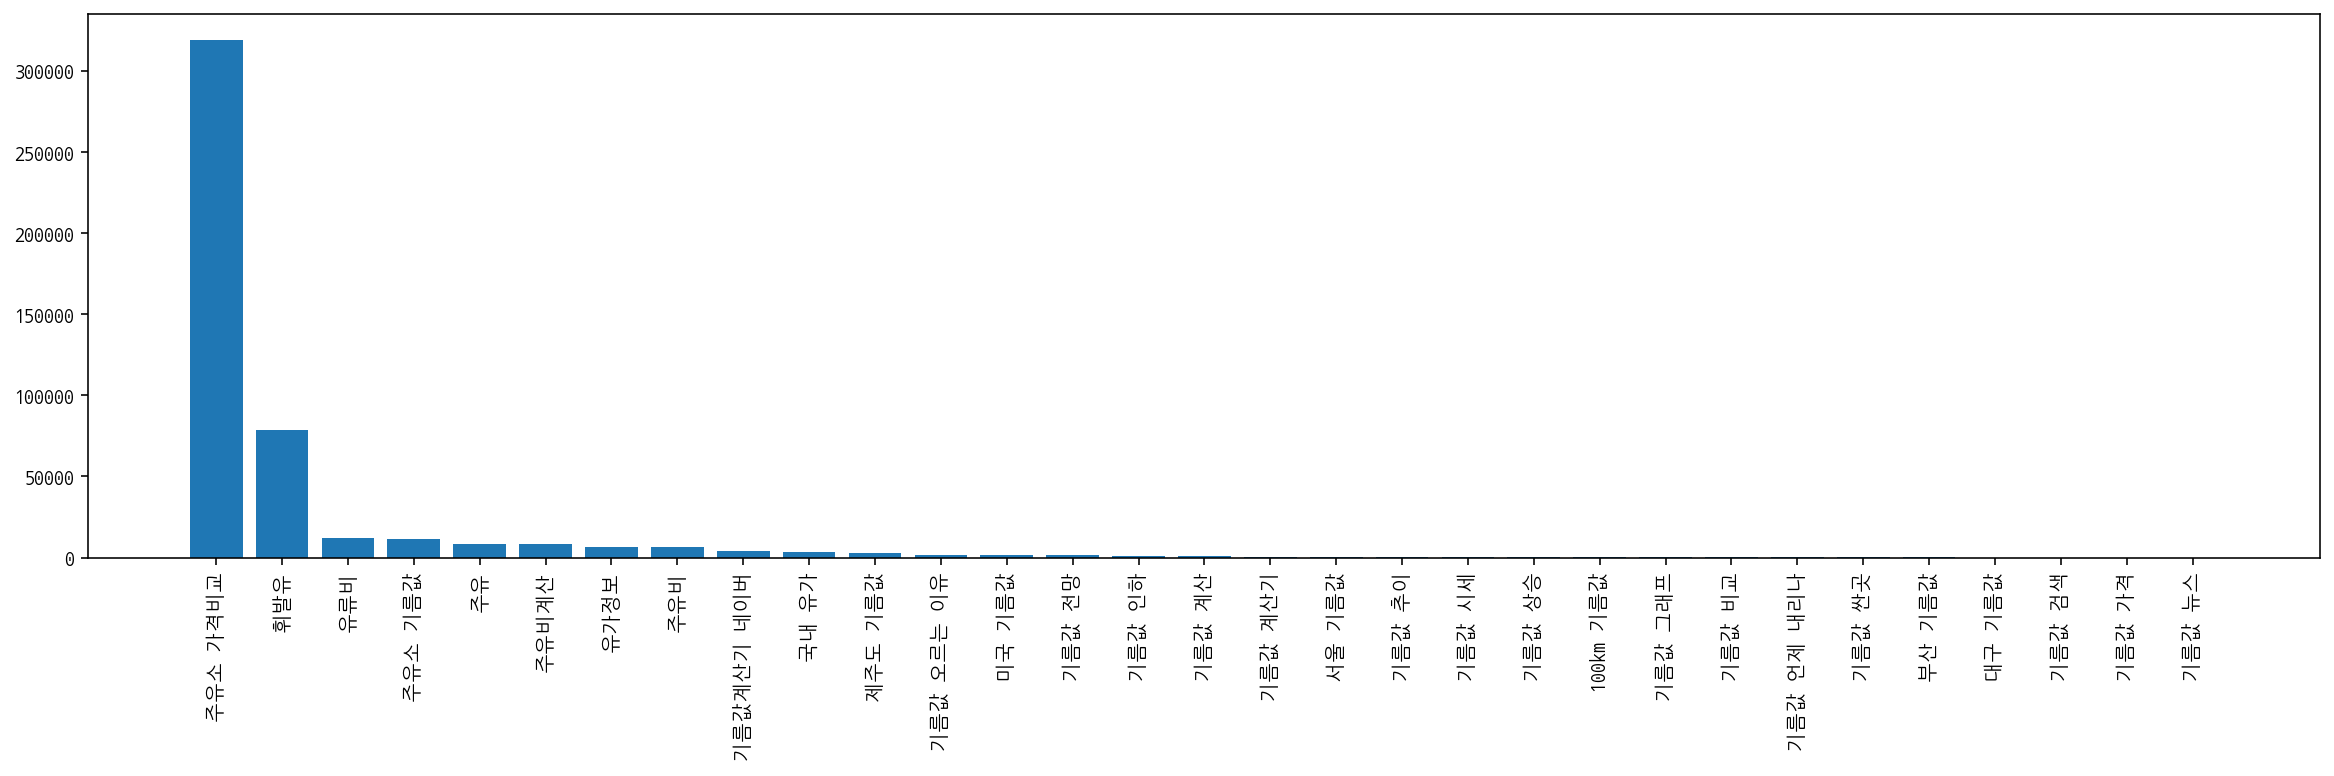

In [31]:
# 단어개수 차트
sorted_keys = sorted(data, key=data.get, reverse=True)
sorted_values = sorted(data.values(), reverse=True)

plt.figure(figsize=(20,5))
plt.bar(range(len(data)), sorted_values, align='center')
plt.xticks(range(len(data)), list(sorted_keys), rotation=90)
plt.show()

In [32]:
# 글자 선명
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\admin\AppData\Local\Temp\ipykernel_5796\141453295.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


#### 워드클라우드 시각화

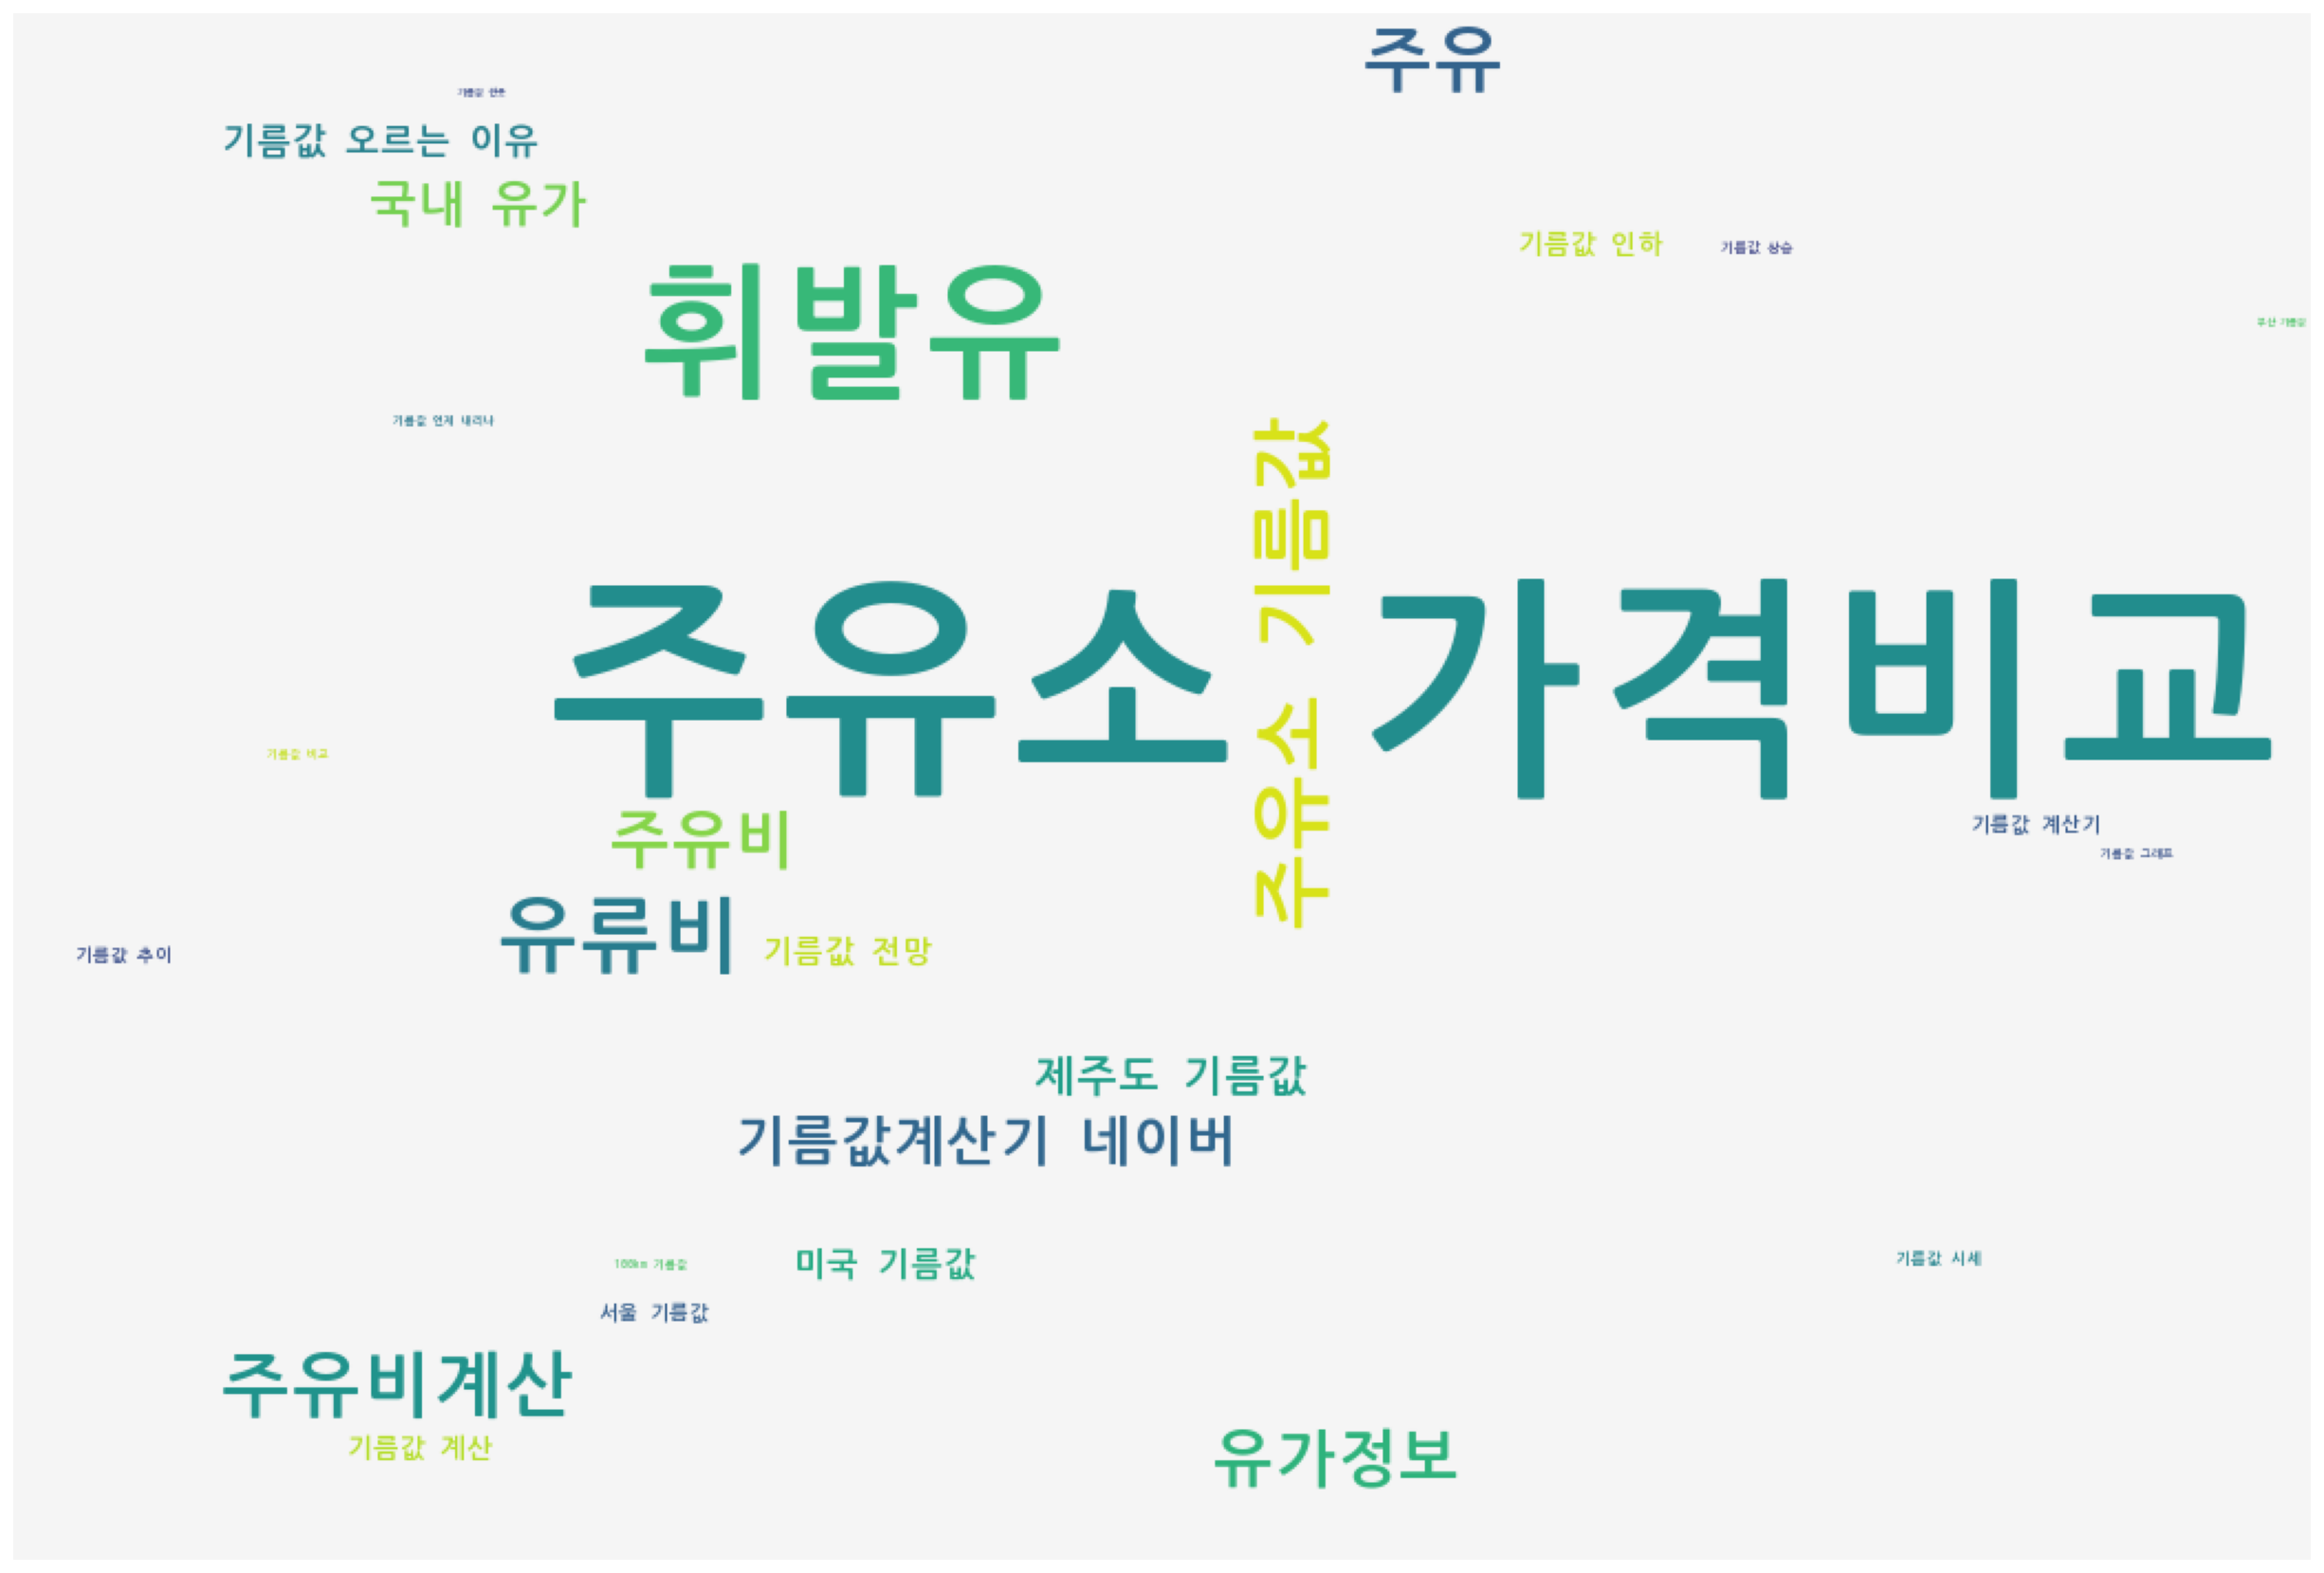

In [33]:
wc = WordCloud(font_path=font_path, background_color='#f5f5f5', width=1040, height=700)
cloud = wc.generate_from_frequencies(data)

plt.figure(figsize=(40,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### 월간검색량이 제일 많은 단어('주유소 가격비교')의 일간 검색 트렌드 확인하기

#### csv 파일 불러오기

In [34]:
trends = pd.read_csv('./data/주유소 가격비교_네이버_일간검색트렌드.csv', encoding='utf-8')
trends.head()

,period,searchVolume
0,2022-02-14,4140
1,2022-02-15,4550
2,2022-02-16,4250
3,2022-02-17,4540
4,2022-02-18,5320


#### 이 그래프를 통해 '주유소 가격비교'를 가장 많이 검색한 날짜와 가격변동이 많은 날짜와 연관성이 있는지에 대해 살펴보자!

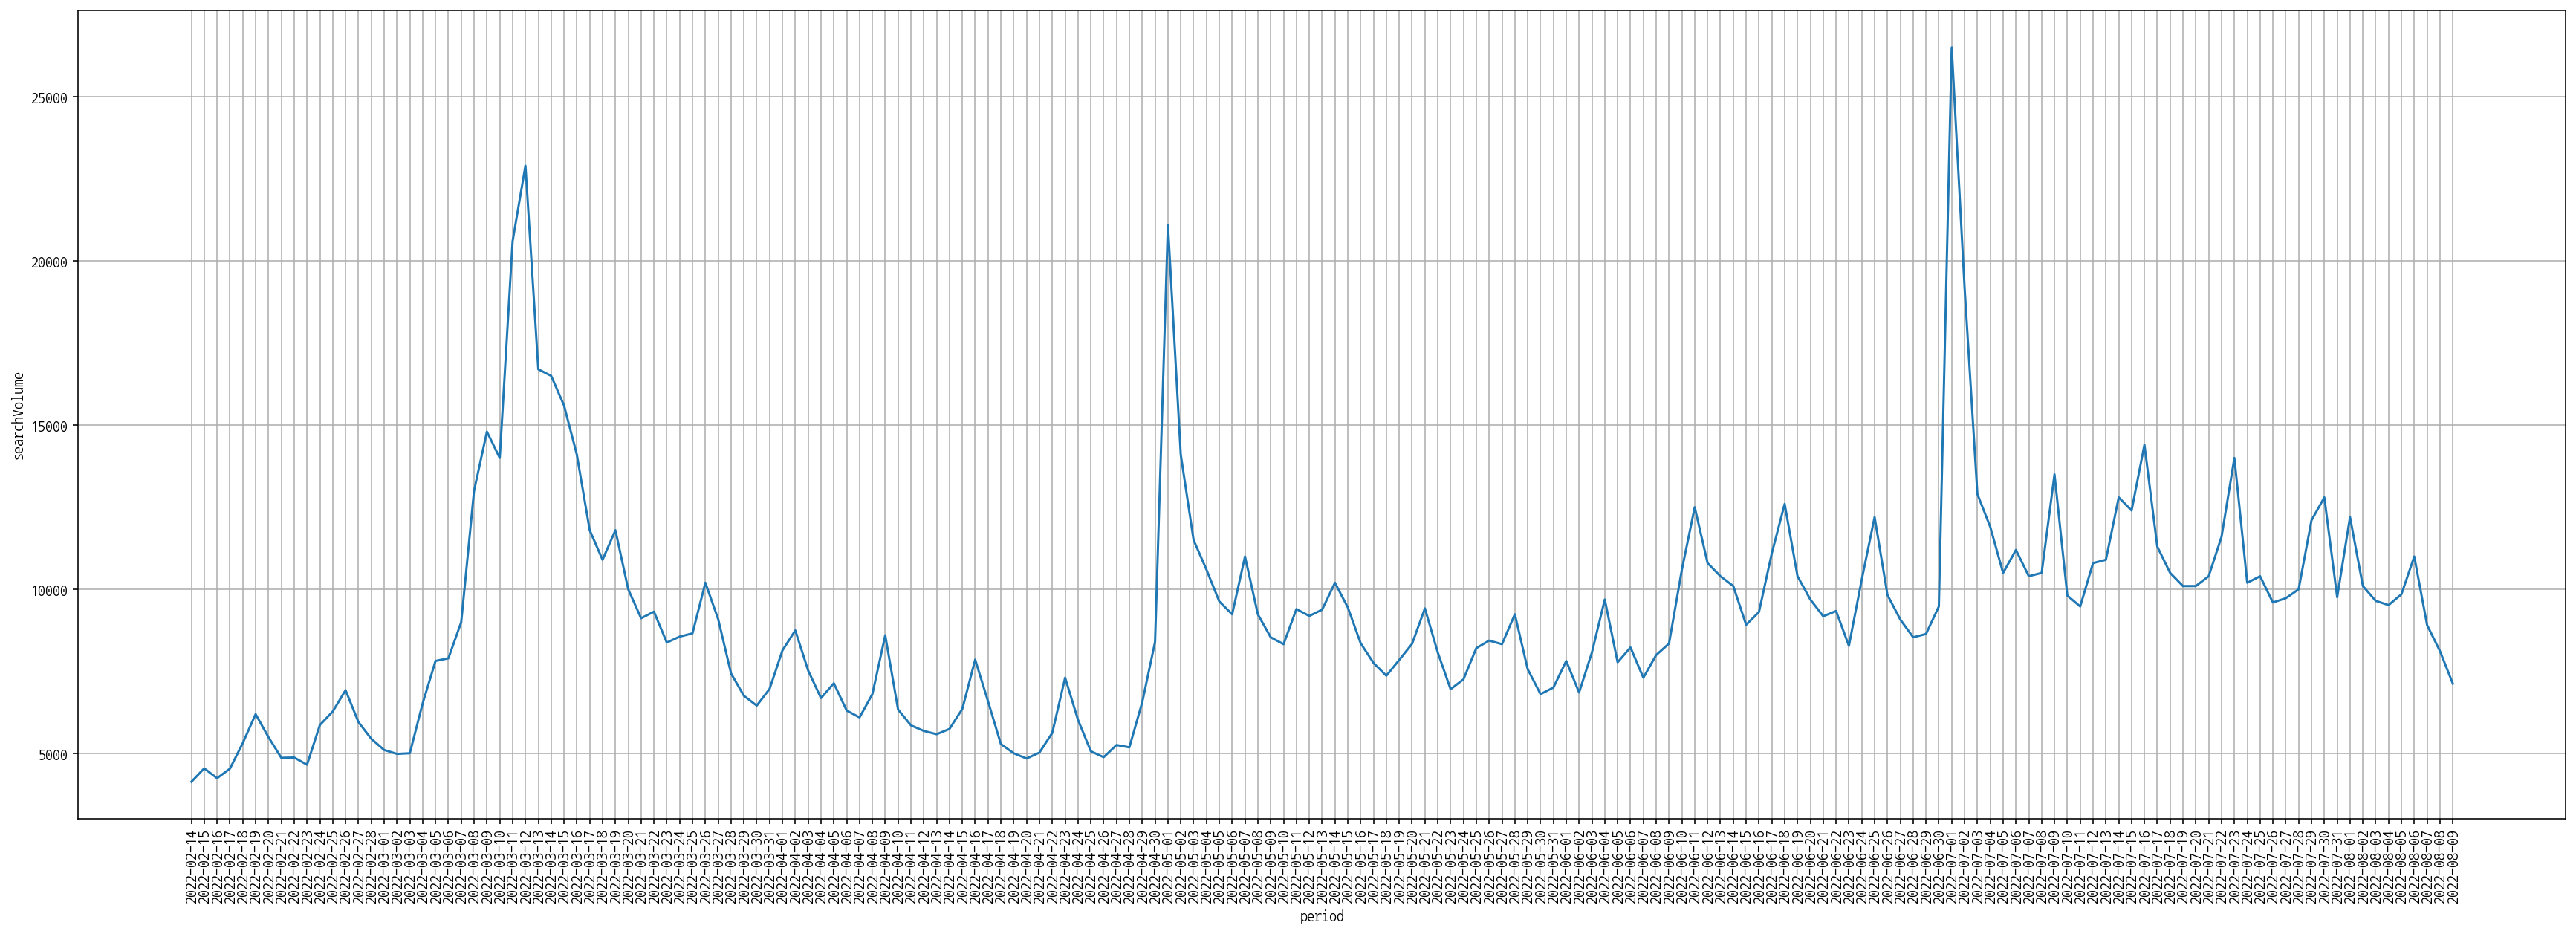

In [52]:
plt.figure(figsize=(30,10))
plt.xlabel('period')
plt.ylabel('searchVolume')
plt.grid(True)
plt.plot(range(len(trends)), trends['searchVolume'])
plt.xticks(range(len(trends)), [text for text in trends['period']], rotation=90)
plt.show()

#### 저희 조의 주제인 기름값에 대해서 알아보기위해 기름값이라는 단어를 2022.2월 초부터 2022.8월초까지 검색량의 추이를 먼저 확인해봄

In [55]:
trends_oil = pd.read_csv('./data/기름값_네이버_일간검색트렌드.csv', encoding='utf-8')
trends_oil.head()

,period,searchVolume
0,2022-02-14,3700
1,2022-02-15,3830
2,2022-02-16,3600
3,2022-02-17,3860
4,2022-02-18,3830


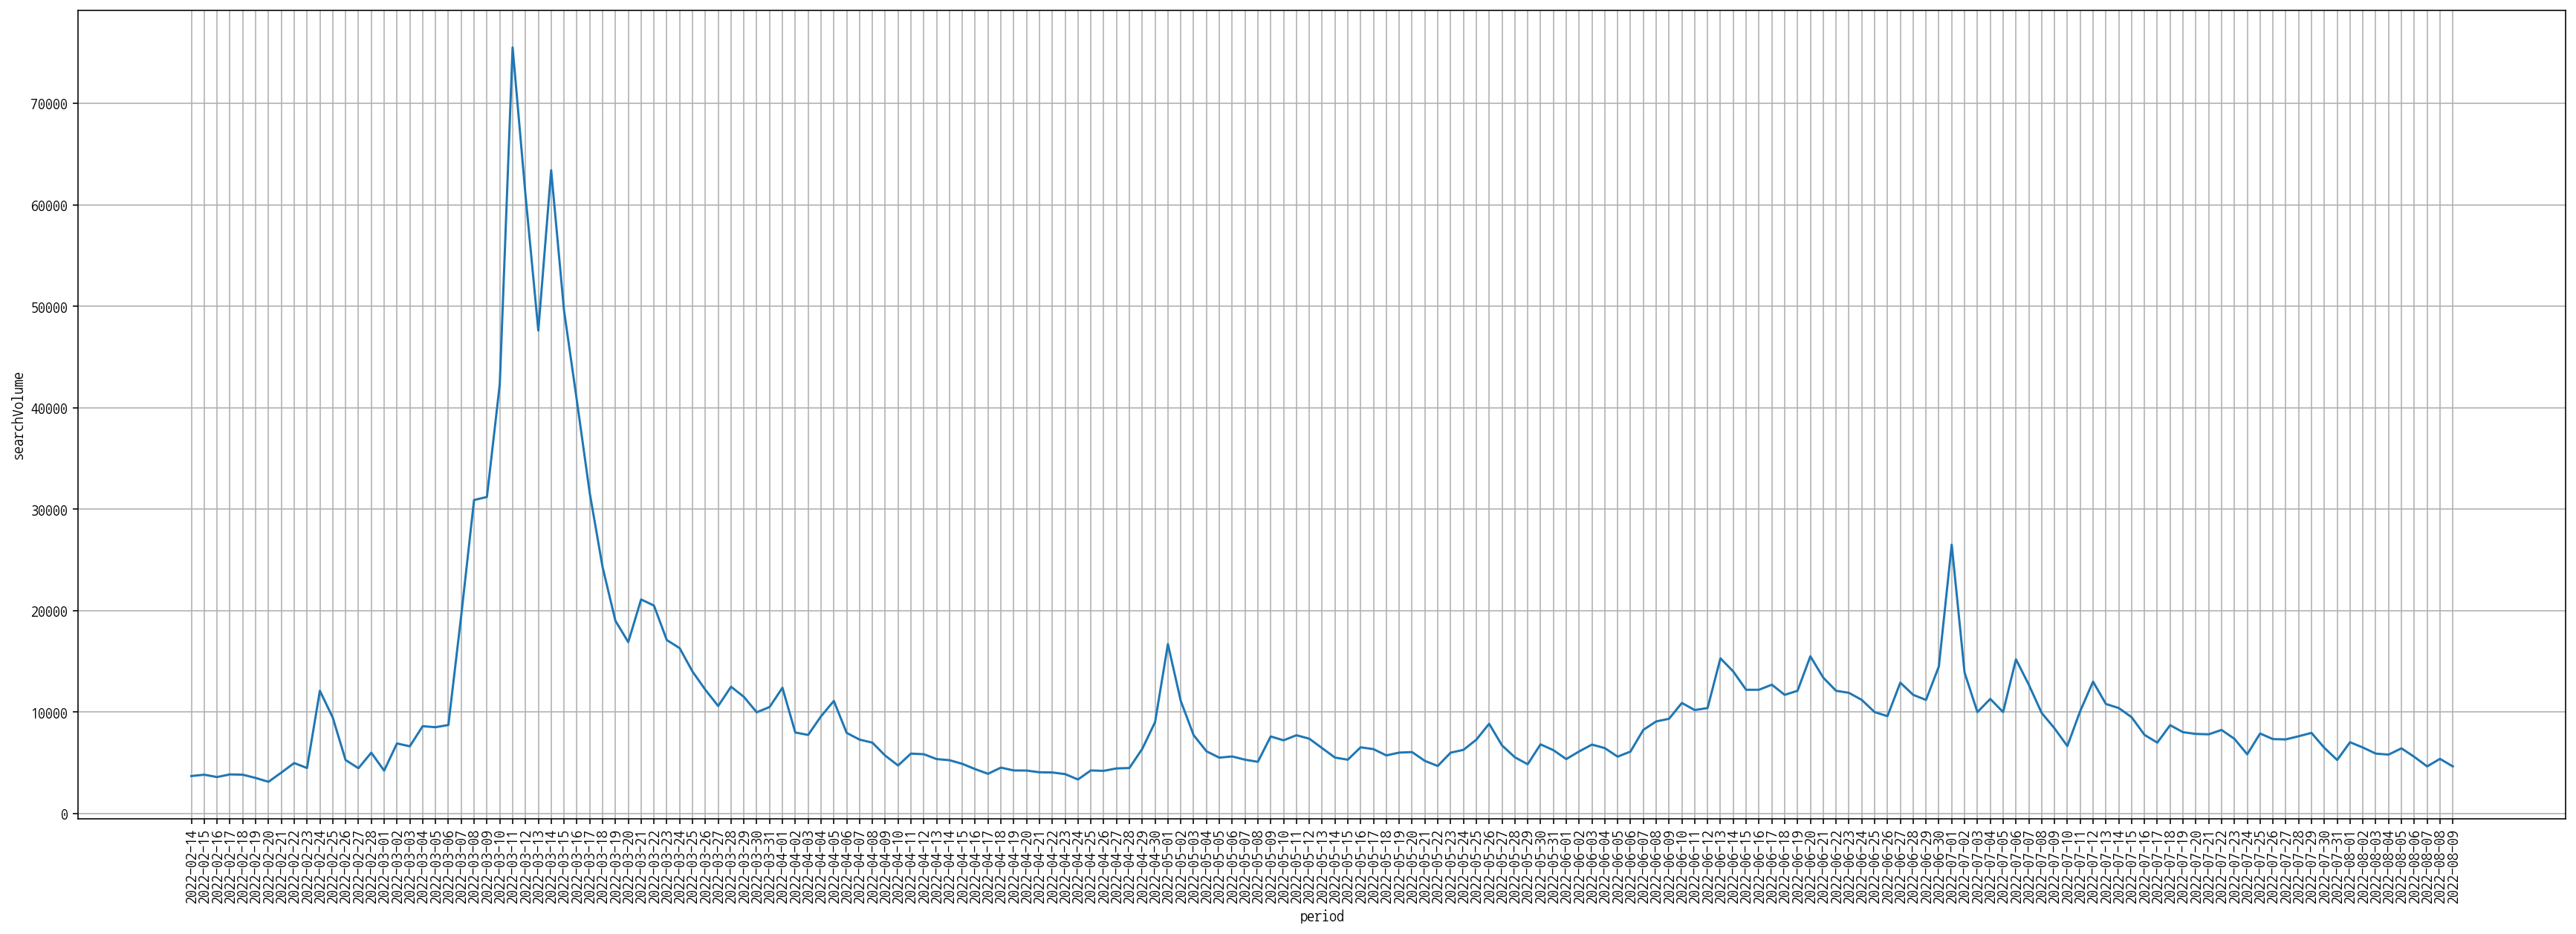

In [56]:
plt.figure(figsize=(30,10))
plt.xlabel('period')
plt.ylabel('searchVolume')
plt.grid(True)
plt.plot(range(len(trends_oil)), trends_oil['searchVolume'])
plt.xticks(range(len(trends_oil)), [text for text in trends_oil['period']], rotation=90)
plt.show()